<a href="https://colab.research.google.com/github/biggiesmalls2/LS-2024-Machine-learningww/blob/main/CNN_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation, LSTM

import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/MyDrive/data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1657 files belonging to 4 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch=data_iterator.next()

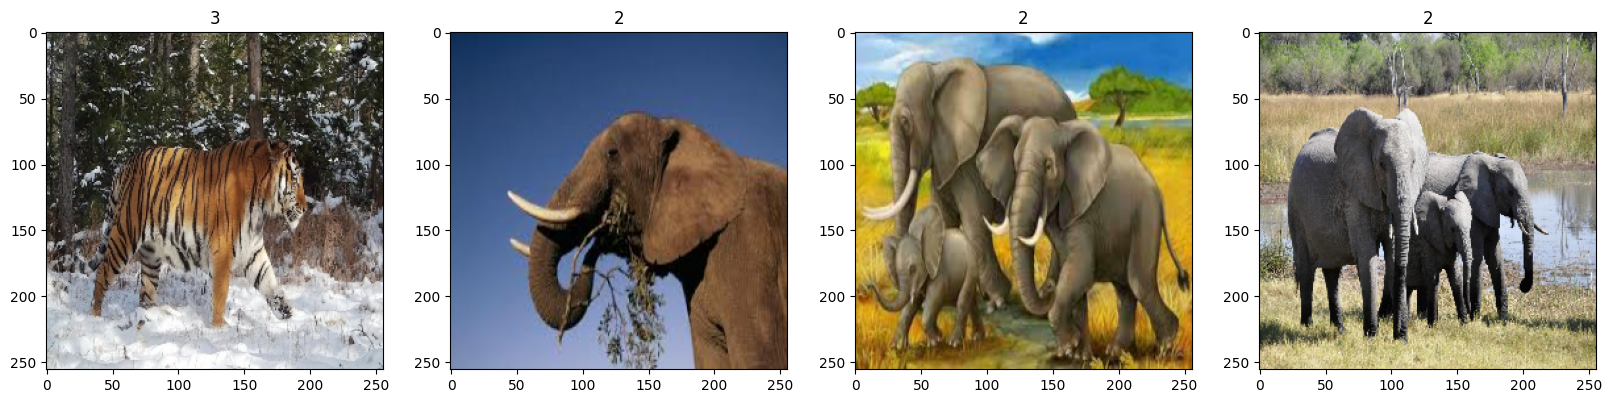

In [6]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
data=data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(data))
first_image = image_batch[0]

In [42]:
# Calculate number of batches
total_batches = tf.data.experimental.cardinality(data).numpy()

# Ratios
train_ratio = 0.7
test_ratio = 0.2

# Calculate number of batches for train, validation, and test sets
train_batches = int(total_batches * train_ratio)
test_batches = int(total_batches * test_ratio)

# Split the dataset
train_data = data.take(train_batches)
test_data = data.skip(train_batches + val_batches).take(test_batches)



In [43]:

input_shape = (256, 256, 3)

# Number of classes for classification (e.g., 10 classes)
num_classes = 4

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),


    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])




In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:

history = model.fit(
    train_data,
    epochs=10,
    batch_size=64,
    verbose=1
)


Epoch 1/10
36/36 [==============================] - 113s 3s/step - loss: 2.1389 - accuracy: 0.3264
Epoch 2/10
36/36 [==============================] - 109s 3s/step - loss: 1.1106 - accuracy: 0.5451
Epoch 3/10
36/36 [==============================] - 110s 3s/step - loss: 0.6781 - accuracy: 0.7491
Epoch 4/10
36/36 [==============================] - 108s 3s/step - loss: 0.3632 - accuracy: 0.8898
Epoch 5/10
36/36 [==============================] - 112s 3s/step - loss: 0.1762 - accuracy: 0.9505
Epoch 6/10
36/36 [==============================] - 123s 3s/step - loss: 0.1262 - accuracy: 0.9783
Epoch 7/10
36/36 [==============================] - 122s 3s/step - loss: 0.0998 - accuracy: 0.9792
Epoch 8/10
36/36 [==============================] - 124s 3s/step - loss: 0.0536 - accuracy: 0.9896
Epoch 9/10
36/36 [==============================] - 124s 3s/step - loss: 0.0320 - accuracy: 0.9905
Epoch 10/10
36/36 [==============================] - 124s 3s/step - loss: 0.0224 - accuracy: 0.9913


In [47]:
loss,accuracy=model.evaluate(test_data, verbose=2)


6/6 - 23s - loss: 0.6015 - accuracy: 0.8595 - 23s/epoch - 4s/step


In [48]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8594594597816467
